# Initializing config, dataset and the oracle

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset import Config, Dataset
from oracle import Oracle
from active_learning import Learner

config = Config(70, 10)
data = Dataset(config)
orac_lc = Oracle(data, config)
orac_ms = Oracle(data, config)
orac_h = Oracle(data, config)

# Visualizing the digit dataset after PCA

In [3]:
from sklearn.decomposition import PCA

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=2)
decomposed_digit = pca.fit_transform(X = data.x_raw)

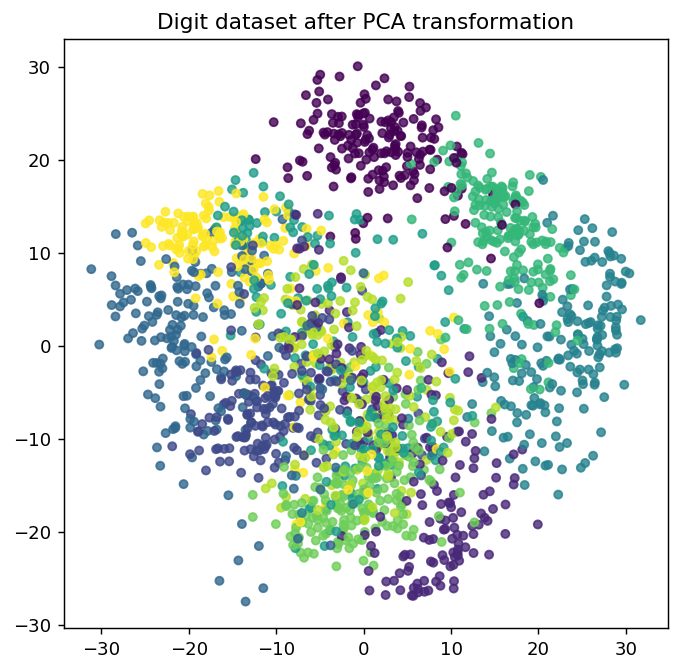

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Isolate the data we'll need for plotting.
x_component, y_component = decomposed_digit[:, 0], decomposed_digit[:, 1]

test_c1, test_c2 = [], []
for i in range(len(data.test_indices)):
    test_c1.append(x_component[data.test_indices[i]])
    test_c2.append(y_component[data.test_indices[i]])

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(6, 6), dpi=130)
plt.scatter(x = x_component, y = y_component, c = data.y_raw, cmap = 'viridis', s = 20, alpha = 8/10)
plt.title('Digit dataset after PCA transformation')
plt.show()

# Instantiating a Learner instance

In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, probability=True)
least_count_learner = Learner([clf], "uncertainty", uncertainty = "lc")

# Initial training for the active learners

In [6]:
least_count_learner.train(orac_lc)
initial_pred_lc = least_count_learner.predict(data.test_X)

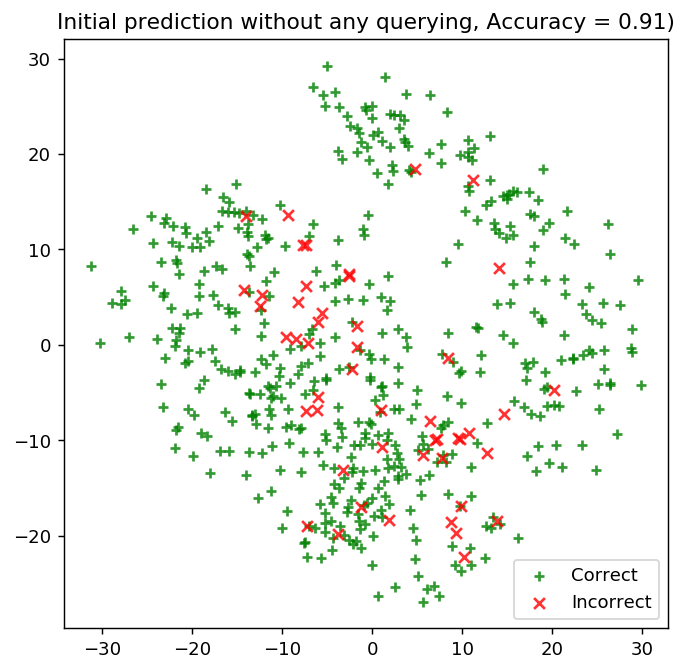

In [7]:
import numpy as np

is_correct = (initial_pred_lc == np.array(data.test_Y))

fig, ax1 = plt.subplots(figsize=(6, 6), dpi=130)
fig.suptitle = "Initial prediction without any querying"

ax1.scatter(x=np.array(test_c1)[is_correct],  y=np.array(test_c2)[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax1.scatter(x=np.array(test_c1)[~is_correct], y=np.array(test_c2)[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax1.legend(loc='lower right')
ax1.set_title("Initial prediction without any querying, Accuracy = {score:.2f})".format(score=least_count_learner.test_score(data)))

plt.show()

In [8]:
import random
from math import floor

lst = list(range(len(orac_lc.pool_X)))
cluster_indices = random.sample(lst, floor(config.cluster_prop * len(orac_lc.pool_X)))

cluster_X = [orac_lc.pool_X[idx] for idx in cluster_indices]
cluster_Y = [orac_lc.pool_Y[idx] for idx in cluster_indices]

transformed_coords = pca.fit_transform(X = cluster_X)

# Before clustering

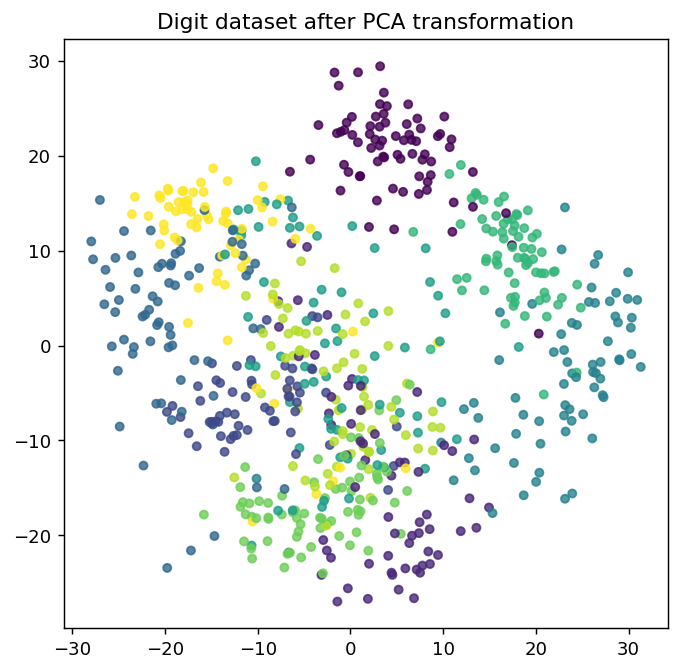

In [9]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(6, 6), dpi=130)
plt.scatter(x = transformed_coords[:,0], y = transformed_coords[:,1], c = cluster_Y, cmap = 'viridis', s = 20, alpha = 8/10)
plt.title('Digit dataset after PCA transformation')
plt.show()

# Performing clustering

In [10]:
from sklearn.cluster import KMeans
# Specify model for clustering
kmeans = KMeans(n_clusters = config.num_clusters, random_state=0).fit(cluster_X)
#clustering ouput
kmeans.labels_

array([6, 6, 1, 6, 6, 4, 1, 6, 7, 1, 4, 5, 4, 1, 6, 6, 7, 6, 7, 1, 5, 7,
       0, 1, 7, 6, 1, 6, 6, 8, 7, 1, 4, 4, 2, 6, 5, 5, 2, 0, 7, 6, 3, 8,
       2, 5, 4, 8, 1, 7, 5, 9, 6, 1, 1, 9, 2, 7, 8, 8, 3, 8, 4, 2, 4, 0,
       1, 7, 9, 2, 6, 2, 9, 5, 4, 3, 6, 1, 0, 7, 5, 6, 3, 1, 1, 8, 7, 2,
       5, 9, 8, 7, 6, 5, 4, 5, 2, 6, 5, 5, 8, 6, 6, 4, 6, 7, 5, 8, 6, 3,
       7, 2, 7, 9, 4, 3, 9, 6, 8, 6, 3, 9, 1, 2, 1, 5, 5, 7, 2, 7, 8, 8,
       5, 4, 4, 8, 6, 1, 6, 6, 1, 8, 5, 5, 3, 4, 8, 8, 5, 6, 1, 9, 7, 5,
       8, 7, 3, 0, 7, 9, 0, 5, 2, 9, 9, 6, 5, 5, 5, 2, 8, 6, 9, 9, 6, 8,
       2, 1, 1, 8, 8, 4, 5, 6, 6, 0, 3, 8, 4, 1, 1, 4, 3, 7, 7, 5, 5, 6,
       9, 6, 4, 0, 6, 6, 5, 1, 1, 9, 5, 6, 5, 8, 1, 4, 1, 3, 8, 5, 4, 7,
       3, 6, 8, 5, 0, 4, 2, 7, 5, 3, 8, 1, 1, 7, 4, 5, 4, 6, 6, 1, 5, 2,
       1, 6, 4, 8, 9, 8, 8, 7, 1, 9, 9, 8, 8, 8, 2, 4, 4, 9, 7, 4, 1, 8,
       5, 7, 4, 4, 1, 3, 8, 6, 8, 3, 7, 8, 4, 1, 2, 5, 8, 3, 9, 9, 6, 3,
       0, 1, 4, 5, 9, 7, 3, 8, 7, 7, 9, 1, 4, 5, 3,

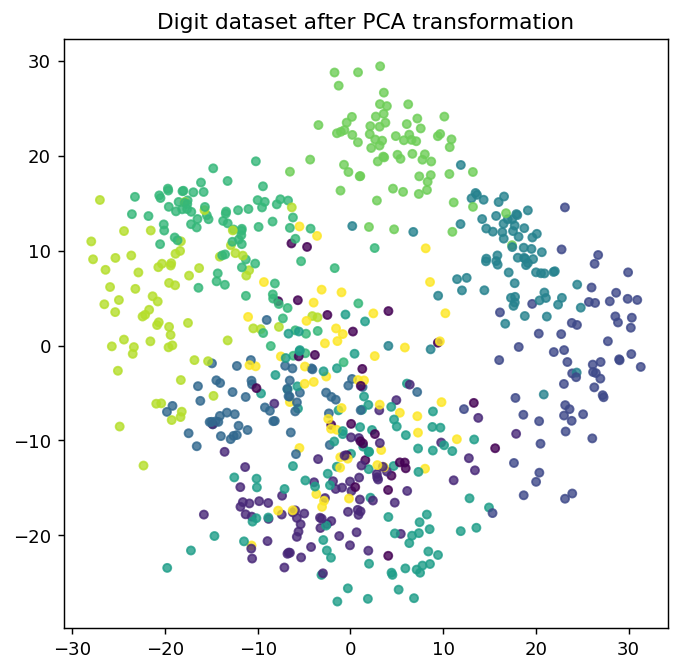

In [11]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(6, 6), dpi=130)
plt.scatter(x = transformed_coords[:,0], y = transformed_coords[:,1], c = kmeans.labels_, cmap = 'viridis', s = 20, alpha = 8/10)
plt.title('Digit dataset after PCA transformation')
plt.show()

In [16]:
clusters = []
targets = []
for i in range(config.num_clusters):
    clusters.append(np.array(cluster_X)[kmeans.labels_ == i])
    targets.append(np.array(cluster_Y)[kmeans.labels_ == i])